# Step - 2

## Preconditions

### Install the required libraries
```bash
pip install -r requirements.txt
```



In [2]:
# Importing the required libraries
import trimesh
import os
import matplotlib.pyplot as plt
import json
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd

## Step 2.1: Analyzing a Single Shape

In [17]:
def analyze_shape(_file_path):
    try:
        mesh = trimesh.load(_file_path)
        num_vertices = len(mesh.vertices)
        num_faces = len(mesh.faces)
        face_types = mesh.faces.shape[1]  # 3 for triangles, 4 for quads
        bounding_box = mesh.bounding_box.extents
        return num_vertices, num_faces, face_types, bounding_box
    except Exception as e:
        print(f"Error processing {_file_path}: {e}")
        return None

## Step 2.2: Statistics Over the Whole Database

In [18]:
# Getting the properties of all the shapes
shape_data = []

# Define the root folder where the search begins
root_folder = './ShapeDatabase_INFOMR-master'

# List to store all .obj file paths
obj_file_paths = []

# Walk through the folder structure
for dirpath, dirnames, filenames in os.walk(root_folder):
    for file in filenames:
        if file.endswith('.obj'):
            # Get the full file path and add it to the list
            full_path = os.path.join(dirpath, file)
            obj_file_paths.append(full_path)

# Print all .obj file paths                                                                                  
for path in obj_file_paths:
    file_path = path.replace('\\', '/')
    genre = file_path.split('/')[-2]
    shape_name = file_path.split('/')[-1].split('.')[0]
    shape_properties = analyze_shape(file_path)
    shape_data.append({
        'file_path': file_path,
        'genre': genre,
        'shape_name': shape_name,
        'num_vertices': shape_properties[0],
        'num_faces': shape_properties[1],
        'face_types': shape_properties[2],
        'bounding_box': shape_properties[3].tolist()
    })

In [19]:
# remove the outliers from the shape_data where num_vertices <= 100 or num_faces <= 100
shape_data_filtered = [data for data in shape_data if data['num_vertices'] > 100 and data['num_faces'] > 100]
print(f"Number of outliers: {len(shape_data) - len(shape_data_filtered)}")

Number of outliers: 95


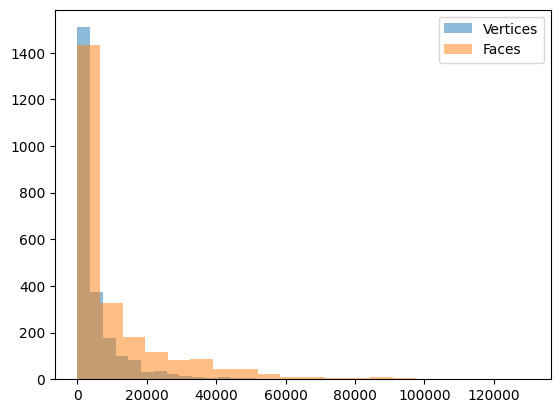

In [20]:
# Data preparation
vertices = [data['num_vertices'] for data in shape_data_filtered]
faces = [data['num_faces'] for data in shape_data_filtered]

# Histogram plot
plt.hist(vertices, bins=20, alpha=0.5, label='Vertices')
plt.hist(faces, bins=20, alpha=0.5, label='Faces')
plt.legend(loc='upper right')                                                                                                                                                                                                                                                                                                            
plt.show()

69


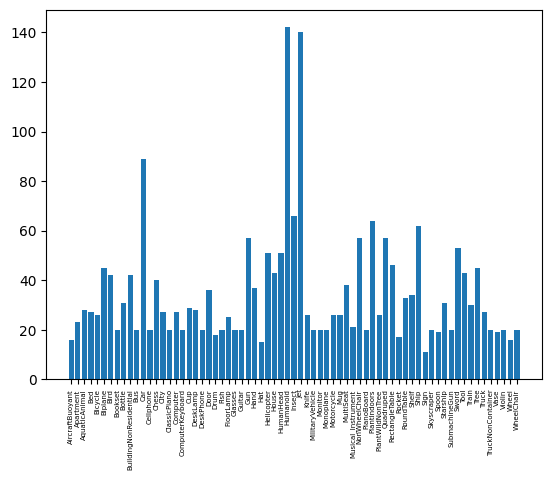

In [21]:
# check the number of each genre in the dataset
# then plot the bar chart
# then x-axis is the genre and y-axis is the number of shapes in that genre
from collections import Counter
genre_count = Counter([data['genre'] for data in shape_data_filtered])
print(len(genre_count))
plt.bar(genre_count.keys(), genre_count.values())
# and the x-axis should be tilted 45 degrees
plt.xticks(rotation=90)
# and the x-axies fonr size should be 5
plt.xticks(fontsize=5)
# make the figure size bigger
plt.show()

In [22]:
# find the median and avrage number of the genre_count
import numpy as np
median = np.median(list(genre_count.values()))
average = np.mean(list(genre_count.values()))
print(f"Median: {median}, Average: {average}")


Median: 27.0, Average: 34.608695652173914


## 2.3 Resampling Data

In [23]:
# Choose the average number of shapes per genre as the threshold
# for those genres that have fewer shapes than the threshold, we will upsample them
# for those genres that have more shapes than the threshold, we will downsample them
import random
threshold = int(average)
print(f"Threshold: {threshold}")
# UP_SAMPLING_LIMITATION = threshold - 5
# DOWN_SAMPLING_LIMITATION = threshold + 5

# Resampling the data
resampled_data = []
for genre, count in genre_count.items():
    genre_data = [data for data in shape_data_filtered if data['genre'] == genre]
    if count < threshold:
        random.shuffle(genre_data)
        # 当计数小于上采样限制时，进行上采样
        resampled_data.extend(genre_data * (threshold // count))
        resampled_data.extend(genre_data[:threshold % count])
    elif count >= threshold:
        # 当计数大于下采样限制时，进行下采样
        # 随机选择一部分数据
        random.shuffle(genre_data)
        resampled_data.extend(genre_data[:threshold])
    # else:
    #     # 如果在限制范围内，直接使用现有数据
    #     resampled_data.extend(genre_data)


Threshold: 34


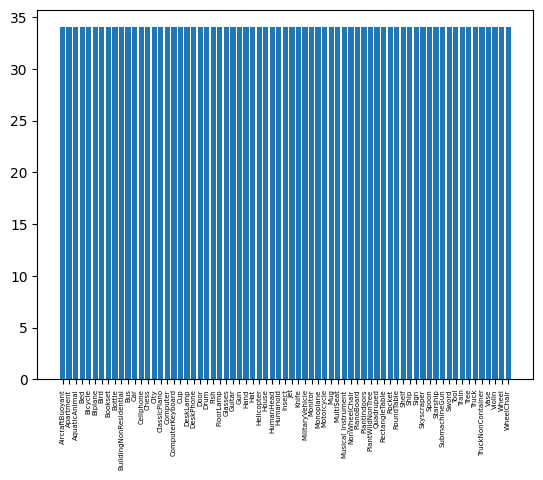

In [24]:
resmapled_genre_count = Counter([data['genre'] for data in resampled_data])

plt.bar(resmapled_genre_count.keys(), resmapled_genre_count.values())
# and the x-axis should be tilted 45 degrees
plt.xticks(rotation=90)
# and the x-axies fonr size should be 5
plt.xticks(fontsize=5)
# make the figure size bigger
plt.show()

In [25]:
resmapled_genre_count

Counter({'AircraftBuoyant': 34,
         'Apartment': 34,
         'AquaticAnimal': 34,
         'Bed': 34,
         'Bicycle': 34,
         'Biplane': 34,
         'Bird': 34,
         'Bookset': 34,
         'Bottle': 34,
         'BuildingNonResidential': 34,
         'Bus': 34,
         'Car': 34,
         'Cellphone': 34,
         'Chess': 34,
         'City': 34,
         'ClassicPiano': 34,
         'Computer': 34,
         'ComputerKeyboard': 34,
         'Cup': 34,
         'DeskLamp': 34,
         'DeskPhone': 34,
         'Door': 34,
         'Drum': 34,
         'Fish': 34,
         'FloorLamp': 34,
         'Glasses': 34,
         'Guitar': 34,
         'Gun': 34,
         'Hand': 34,
         'Hat': 34,
         'Helicopter': 34,
         'House': 34,
         'HumanHead': 34,
         'Humanoid': 34,
         'Insect': 34,
         'Jet': 34,
         'Knife': 34,
         'MilitaryVehicle': 34,
         'Monitor': 34,
         'Monoplane': 34,
         'Motorcycle': 34,

In [26]:
# Save the shape data to a file
# import json
# with open('shape_data.json', 'w') as f:
#     json.dump(resampled_data, f)

In [27]:
# Load the shape data from the file
# import json
# with open('shape_data.json', 'r') as f:
#     resampled_data = json.load(f)

## Step 2.4: Normalizing shapes

In [28]:
def normalize_shape(_mesh):
    centroid = mesh.centroid
    mesh.vertices -= centroid  # 平移到原点
    max_extent = mesh.bounding_box.extents.max()  # 获取最大边长
    if max_extent > 0:
        mesh.vertices /= max_extent  # 统一缩放
    return mesh

In [29]:
# save all the normalized shapes to a folder

# 1.create the genre folders
genre_names = list(resmapled_genre_count.keys())
for genre in genre_names:
    os.makedirs(f'./normalized_database/{genre}', exist_ok=False)
    
# 2.save the normalized shapes to the genre folders
for data in resampled_data:
    mesh = trimesh.load(data['file_path'])
    normalized_mesh = normalize_shape(mesh)
    normalized_mesh.export(f"./normalized_database/{data['genre']}/{data['shape_name']}.obj")
    
# 3.save the shape data to a file
# Getting the properties of all the shapes
normalized_shape_data = []

# Define the root folder where the search begins
normalized_shape_folder = './normalized_database'

# List to store all .obj file paths
normalized_obj_file_paths = []

# Walk through the folder structure
for dirpath, dirnames, filenames in os.walk(normalized_shape_folder):
    for file in filenames:
        if file.endswith('.obj'):
            # Get the full file path and add it to the list
            full_path = os.path.join(dirpath, file)
            normalized_obj_file_paths.append(full_path)

# Print all .obj file paths                                                                                  
for path in normalized_obj_file_paths:
    file_path = path.replace('\\', '/')
    genre = file_path.split('/')[-2]
    shape_name = file_path.split('/')[-1].split('.')[0]
    shape_properties = analyze_shape(file_path)
    normalized_shape_data.append({
        'file_path': file_path,
        'genre': genre,
        'shape_name': shape_name,
        'num_vertices': shape_properties[0],
        'num_faces': shape_properties[1],
        'face_types': shape_properties[2],
        'bounding_box': shape_properties[3].tolist(),
        'centroid': trimesh.load(file_path).centroid.tolist(),
    })

with open('normalized_shape_data.json', 'w') as f:
    json.dump(normalized_shape_data, f)


FileExistsError: [WinError 183] 当文件已存在时，无法创建该文件。: './normalized_database/AircraftBuoyant'

In [ ]:
# check if the normalization works
# condition 1: the centroid of the shape should be (0, 0, 0)
# condition 2: the max extent of the shape should be 1
import numpy as np

# 定义容差值
EPSILON = 0.5  # 根据需要调整

# 假设 normalized_shape_data 是包含归一化后网格数据的列表
for data in normalized_shape_data:
    centroid = data['centroid']
    file_path = data['file_path']
    
    # 条件 1: 检查重心是否接近 (0, 0, 0)
    if not np.allclose(centroid, [0, 0, 0], atol=EPSILON):
        print(f"Error: {file_path} 的重心 {centroid} 不接近 (0, 0, 0)")
    
    # 加载归一化后的网格
    mesh = trimesh.load(file_path)
    
    # 条件 2: 检查最大边长是否接近 1
    max_extent = mesh.bounding_box.extents.max()
    if not np.isclose(max_extent, 1.0, atol=EPSILON):
        print(f"Error: {file_path} 的最大边长 {max_extent} 不接近 1")

# Step 3

In [11]:
# Load the normalized shape data from the JSON file
with open('normalized_shape_data.json', 'r') as f:
    normalized_shape_data = json.load(f)

# Filter shapes that belong to the "AircraftBuoyant" genre
aircraft_shapes = [data for data in normalized_shape_data if data['genre'] == 'AircraftBuoyant']

# Step 3.1: Full Normalization

In [12]:
def normalize_shape(mesh):
    # Centering: Translate the mesh so that its centroid is at the origin
    mesh.vertices -= mesh.center_mass

    # Scaling: Normalize the volume of the mesh to 1
    scale = np.cbrt(1.0 / mesh.volume)
    mesh.vertices *= scale

    # Alignment using PCA: Align the principal axes of the mesh with the coordinate axes
    pca = PCA(n_components=3)
    pca.fit(mesh.vertices)
    aligned_vertices = pca.transform(mesh.vertices)
    mesh.vertices = aligned_vertices

    # Flipping using Moment Test: Ensure the principal axes are consistently oriented
    for axis in range(3):
        if np.sum(mesh.vertices[:, axis]) < 0:
            mesh.vertices[:, axis] *= -1

    return mesh

# Step 3.2: Feature Extraction


In [13]:
def extract_features(mesh):
    features = {}

    # Elementary Descriptors
    features['Surface Area'] = mesh.area
    features['Compactness'] = (36 * np.pi * (mesh.volume ** 2)) / (mesh.area ** 3)
    obb = mesh.bounding_box_oriented
    features['3D Rectangularity'] = mesh.volume / obb.volume
    features['Diameter'] = np.max(mesh.bounding_box.extents)
    convex_hull = mesh.convex_hull
    features['Convexity'] = mesh.volume / convex_hull.volume
    covariance_matrix = np.cov(mesh.vertices, rowvar=False)
    eigenvalues, _ = np.linalg.eigh(covariance_matrix)
    features['Eccentricity'] = max(eigenvalues) / min(eigenvalues)

    # Property Descriptors (using normalized histograms)
    num_samples = 1000
    bins = 10

    random_points = mesh.vertices[np.random.choice(mesh.vertices.shape[0], num_samples, replace=True)]

    # A3: Angle between 3 random vertices
    angles = []
    for i in range(num_samples):
        v1, v2, v3 = random_points[np.random.choice(num_samples, 3, replace=False)]
        vec1 = v2 - v1
        vec2 = v3 - v1
        norm_vec1 = np.linalg.norm(vec1)
        norm_vec2 = np.linalg.norm(vec2)
        if norm_vec1 > 1e-6 and norm_vec2 > 1e-6:
            cos_theta = np.dot(vec1, vec2) / (norm_vec1 * norm_vec2)
            if -1.0 <= cos_theta <= 1.0:
                angles.append(np.arccos(cos_theta))
    if len(angles) > 0:
        features['A3'] = np.histogram(angles, bins=bins, range=(0, np.pi), density=True)[0]
    else:
        features['A3'] = np.zeros(bins)

    # D1: Distance between barycenter and random vertex
    barycenter = mesh.center_mass
    distances = np.linalg.norm(random_points - barycenter, axis=1)
    if len(distances) > 0:
        features['D1'] = np.histogram(distances, bins=bins, density=True)[0]
    else:
        features['D1'] = np.zeros(bins)

    # D2: Distance between 2 random vertices
    d2_distances = []
    for i in range(num_samples // 2):
        v1, v2 = random_points[np.random.choice(num_samples, 2, replace=False)]
        d2_distances.append(np.linalg.norm(v1 - v2))
    if len(d2_distances) > 0:
        features['D2'] = np.histogram(d2_distances, bins=bins, density=True)[0]
    else:
        features['D2'] = np.zeros(bins)

    # D3: Square root of area of triangle given by 3 random vertices
    areas = []
    for i in range(num_samples // 3):
        v1, v2, v3 = random_points[np.random.choice(num_samples, 3, replace=False)]
        if not np.allclose(np.cross(v2 - v1, v3 - v1), 0):
            area = np.linalg.norm(np.cross(v2 - v1, v3 - v1)) / 2
            areas.append(np.sqrt(area))
    if len(areas) > 0:
        features['D3'] = np.histogram(areas, bins=bins, density=True)[0]
    else:
        features['D3'] = np.zeros(bins)

    # D4: Cube root of volume of tetrahedron formed by 4 random vertices
    volumes = []
    for i in range(num_samples // 4):
        retries = 0
        while retries < 5:
            v1, v2, v3, v4 = random_points[np.random.choice(num_samples, 4, replace=False)]
            volume = np.abs(np.dot(v4 - v1, np.cross(v2 - v1, v3 - v1))) / 6
            if volume > 0:
                volumes.append(np.cbrt(volume))
                break
            retries += 1
    if len(volumes) > 0:
        features['D4'] = np.histogram(volumes, bins=bins, density=True)[0]
    else:
        features['D4'] = np.zeros(bins)

    return features

    Surface Area  Compactness  3D Rectangularity   Diameter  Convexity  \
0       5.177430     0.637514           0.400231   1.411360   0.785144   
1       6.430600     0.322349           0.385592   1.392518   0.747411   
2     290.012687     0.000352           0.027284   9.569048   0.058851   
3      15.647701     4.242307           0.603780   5.490716   1.501998   
4       6.152375     0.552095          -0.288679   3.054929  -0.674547   
5       5.764123     0.594836           0.388534   1.900625   0.903770   
6       6.860741     0.350219           0.481720   1.621597   1.037566   
7       5.067494     0.870616           0.403641   1.809748   0.916167   
8     291.504709     0.000005           0.002339  11.042872   0.005675   
9       6.676307     0.377619          -0.393050   3.092365  -0.723505   
10      7.064542     0.320715           0.450244   2.618674   0.826252   
11      6.683318     0.379234           0.392713   3.097109   0.724730   
12      7.373377     0.282402         

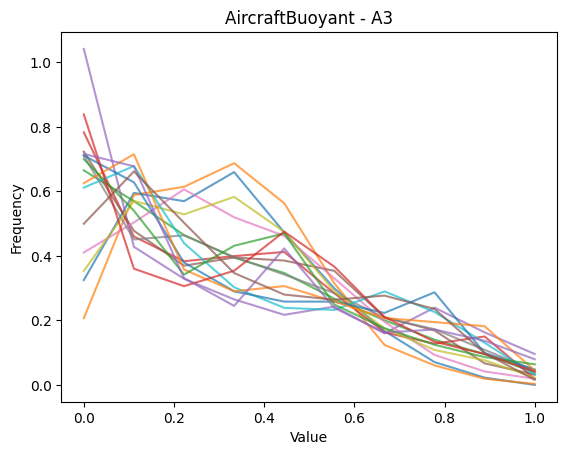

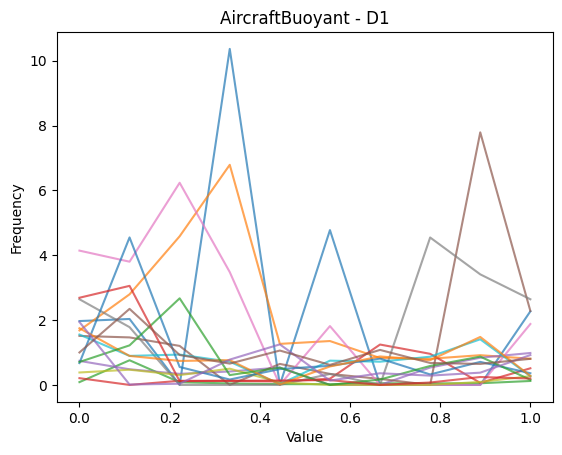

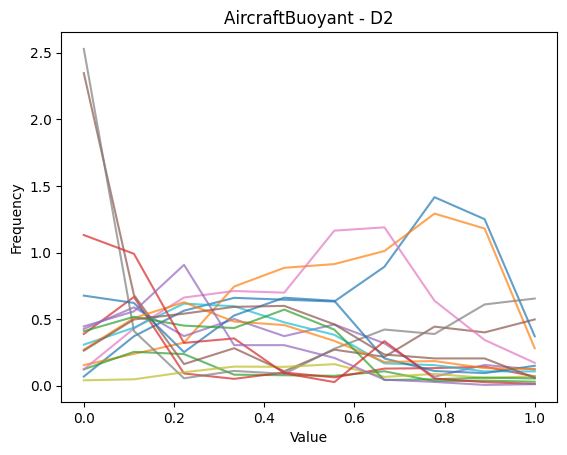

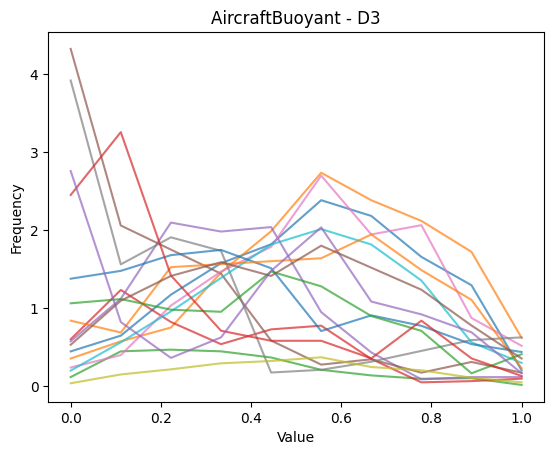

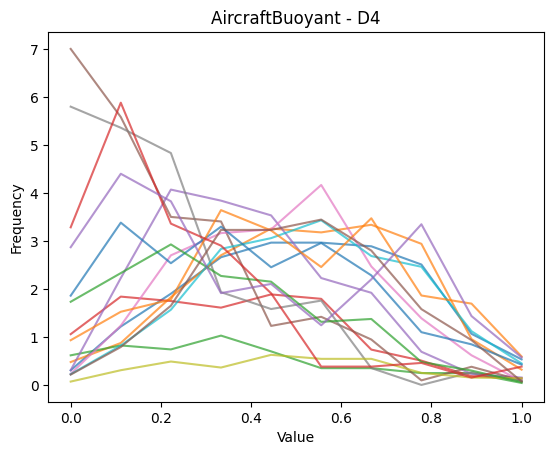

In [14]:
# Example Usage
all_features = []
for data in aircraft_shapes:
    shape = trimesh.load(data['file_path'])
    normalized_shape = normalize_shape(shape)
    features = extract_features(normalized_shape)
    features['Shape File'] = data['file_path']
    all_features.append(features)

# Create a DataFrame for better tabular output
features_df = pd.DataFrame(all_features)
print(features_df)

# Plotting the A3, D1, D2, D3, D4 histograms for all AircraftBuoyant shapes
property_names = ['A3', 'D1', 'D2', 'D3', 'D4']
for prop in property_names:
    plt.figure()
    for index, row in features_df.iterrows():
        plt.plot(np.linspace(0, 1, len(row[prop])), row[prop], alpha=0.7)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'AircraftBuoyant - {prop}')
    plt.show()